# Introduction To Probability \& Statistics: II

*N. Hernitschek, 2022*

This is the fourth Jupyter notebook for **ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)**. 
This Jupyter notebook gives an introduction to probability and statistics with a focus on describing and fitting data similar to those from astronomical surveys.

It is based on code from the textbook

Statistics, Data Mining and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of
Survey Data - Z. Ivezic, A. J. Connolly, J. T. VanderPlas, A. Gray.

***Exercises required for class participation are in <font color='red'>red</font>.***

---
## Contents
* [Descriptive Statistics](#first-bullet)
* [Distributions](#second-bullet)
* [Histograms](#third-bullet)
* [Bivariate and Multivariate pdfs](#fourth-bullet)


## 1. Descriptive Statistics <a class="anchor" id="first-bullet"></a>

Our goal is to estimate $h(x)$ given some measured data, allowing us to reconstruct the empirical distribution $f(x)$. An arbitrary distribution can be characterized by **location** parameters (i.e., position), **scale** parameters (i.e., width), and **shape** parameters. These parameters are called ***descriptive statistics***.

The distribution we're trying to characterize could be anything, e.g. (in astronomy) the distribution of distances of stars.

Python offers many built-in functions for descriptive statistics in its `scipy.stats` package.

We started with this in the previous lecture and continue here.

In [1]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

In [2]:
# Execute this cell
#------------------------------------------------------------
# Let's generate some data: a mix of several Cauchy distributions
random_state = np.random.RandomState(seed=0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * scipy.stats.cauchy(mu, gamma).pdf(x)
                    for (mu, gamma, f) in mu_gamma_f])
data = np.concatenate([scipy.stats.cauchy(mu, gamma).rvs(int(f * N), 
                                                         random_state=random_state)
                       for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(data)
data = data[data > -10]
data = data[data < 30]

Text(0, 0.5, '$f(x)$')

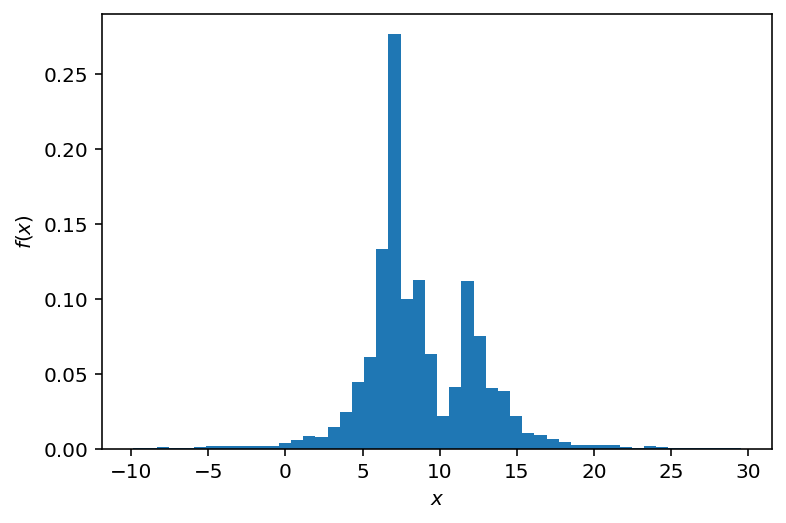

In [3]:
# Execute this cell
# make a histogram to get an idea of what the distribution looks like
plt.hist(data, bins=50, density=True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Using function from `numpy`, we can calculate a few basic statistics:



In [4]:
# Execute this cell
mean = np.mean(data)
median = np.median(data)
print('mean: ',mean)
print('median: ',median)

mean:  8.707331724932475
median:  7.665858989040229


In [5]:

# Execute this cell
var = np.var(data)
std = np.std(data)
print('var: ',var)
print('std: ',std)


var:  14.109284000694963
std:  3.75623268724063


In the lecture we have seen that the **$P\%$ quantiles (or the $p^\mathrm{th}$ percentile, $q_p$)** are computed as
$$\frac{p}{100} = H(q_p) = \int_{-\infty}^{q_p}h(x) dx$$

The full integral from $-\infty$ to $\infty$ is 1 (100%).  So, here you are looking for the value of $x$ that accounts for $p$ percent of the distribution.

For example, compute the 25th, 50th, and 75th percentiles:

In [6]:
# Execute this cell
q25, q50, q75 = np.percentile(data, [25, 50, 75])
print(q25, q50, q75)

6.674244809830177 7.665858989040229 11.61720224123862



The **interquartile range** is the difference between the 25th and 75th percentiles, $q_{75} - q_{25}$.

Just as with the median, the interquartile range is a more *robust* estimator of the scale of a distribution than the standard deviation.  So, one can create a standard-deviation-esque measurement (at least for a Gaussian) from the interquartile range as

$$\sigma_G = 0.7413\times(q_{75} - q_{25})$$  

The normalization makes it *unbiased* for a perfect Gaussian (more on that later).


<font color='red'>In the following cell, carry out the computations for the interquartile range and $\sigma_G$.</font>

In [7]:
# Execute this cell. Think about and discuss the results.
from astroML import stats as astroMLstats

#Interquartile range 
IQrange = q75-q25
print(IQrange)

# original data
print(astroMLstats.sigmaG(data), np.std(data))

4.942957431408444
3.6642198268924555 3.75623268724063


Ans: 

In [8]:
mask = data > 15
data2 = data.copy()
data2[mask] = 100

good = data > 15
mynewdata = data[good]

In [9]:
# corrupted by outliers
print(astroMLstats.sigmaG(data2), np.std(data2))

3.6642198268924555 18.853355225627336


## 2. Distributions <a class="anchor" id="second-bullet"></a>

`scipy.stats` provides many different distributions. We just show a few here as examples.

### Uniform distribution

We can access the uniform distribution from`scipy` as follows: 
We import `uniform`from `scipy.stats` and access its probability distribution function via `.pdf(x)` which returns the value of the pdf at a given $x$. We use `.rvs(size=N)` to produce `N` random draws from the distribution. Lots of distributions can be accessed and used in a similar way.  

see also the documentation at: (http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform)

<font color='red'>run the following cell to plot the uniform distribution</font>

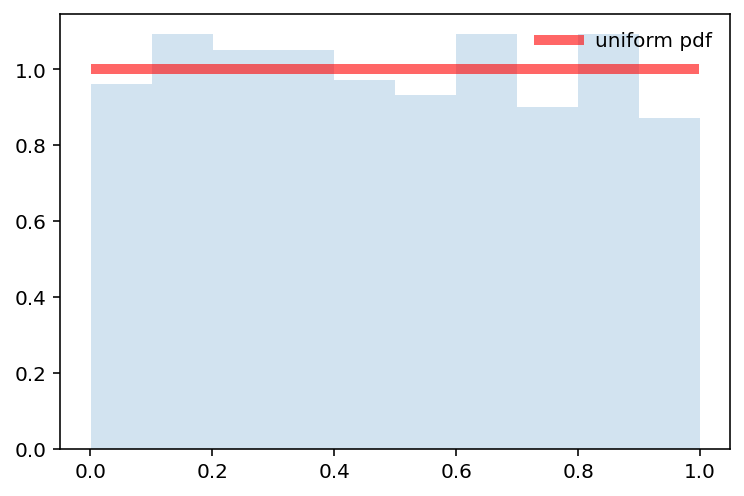

In [10]:
from scipy.stats import uniform

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

x = np.linspace(uniform.ppf(0.01),

                uniform.ppf(0.99), 100)

ax.plot(x, uniform.pdf(x),

       'r-', lw=5, alpha=0.6, label='uniform pdf')

# generate random numbers

r = uniform.rvs(size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)



### Gaussian Distribution

As many of you know, the Gaussian distribution pdf is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.

<font color='red'>using the documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=stats%20norm#scipy.stats.norm, complete and run the following cell</font>

In [11]:
distG = scipy.stats.norm(100,15) # Normal distribution with mean = 100, stdev = 15
print(distG)
draws = distG.rvs(10) # 10 random draws
p = distG.pdf(0) # pdf evaluated at x=0

print(draws)
print(p)

[104.07009366 115.30325726  91.71467396 120.49402388 111.31459317
  89.79268177 137.89467234  90.65545055 129.67063852 122.09269246]
5.940600124901435e-12


<font color='red'>complete and run the following cell to plot the Gaussian distribution</font>

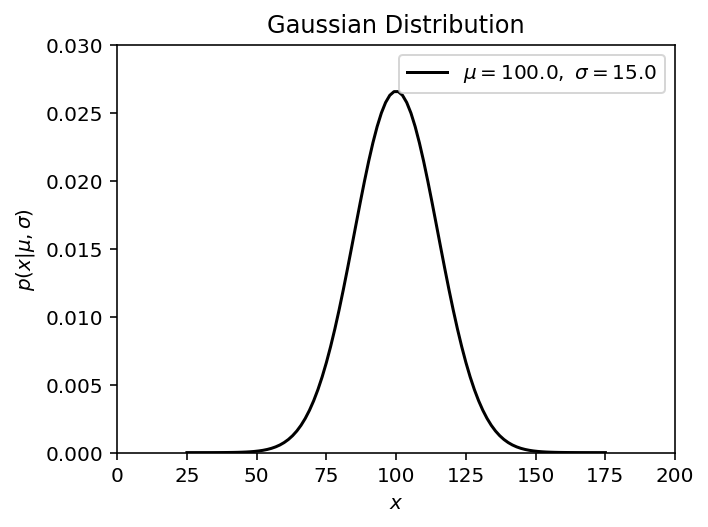

In [13]:
#Get range
mu = distG.mean()
sigma = distG.std()
lowRange = mu - 5*sigma
upRange = mu + 5*sigma

## Plot a Gaussian Distribution
xgrid = np.linspace(lowRange,upRange,100) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid
# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

## 3. Histograms <a class="anchor" id="third-bullet"></a>



You have some one-dimensional ("univariate") data that you would like to try to understand. Where by "understand" we mean "know the distribution in the measured space", i.e., you want to know the probability distribution function (PDF). The easiest way to do that is to make a histogram. It's, however not as simple as it seems...

Let's work through some examples to see what problems we encounter and how we might overcome them.


In [14]:
# Execute this cell to generate a univariate data array, x
# this is the same data used in Ivezic, Figure 6.5

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
#  this is the same data used in the Bayesian Blocks figure
np.random.seed(0)
N = 1000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * scipy.stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([scipy.stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]



Now let's take a look at the data by making a histogram.

Use

`plt.hist()`

This function plots a histogram of any univariate data array given as an argument. It takes lots of other arguments too. See (https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html). You might start with histtype = "step" so that we can later add information to the plot and still see the original histogram. See what happens if you don't do this.


(array([  4.,   9.,  27., 191., 429., 225.,  76.,  14.,   3.,   3.]),
 array([-6.92142972, -3.53746832, -0.15350693,  3.23045447,  6.61441586,
         9.99837726, 13.38233865, 16.76630005, 20.15026145, 23.53422284,
        26.91818424]),
 <BarContainer object of 10 artists>)

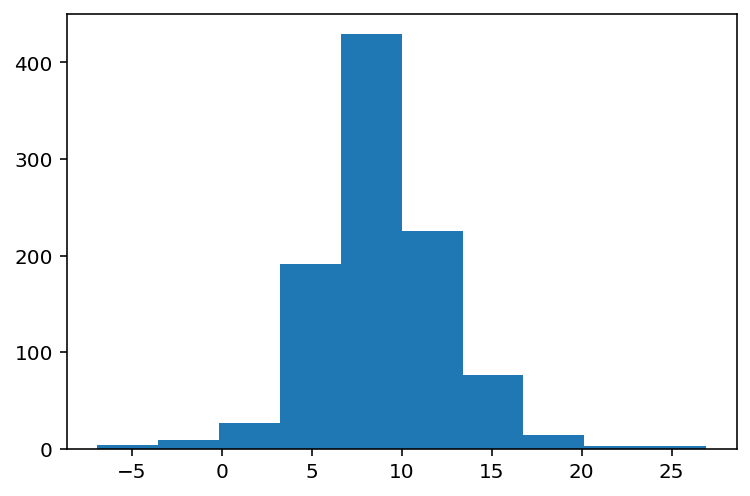

In [15]:
plt.hist(x)



How would you characterize this distribution? Could we reasonably think of it as a normal (Gaussian) distribution that we could characterize by some mean and standard deviation? Maybe, but even just by looking at this plot we see that it wouldn't be a particularly good description of the data.

Now do what we would typically do in astronomy: try re-plotting the histogram a couple of different ways to see if it reveals anything more about the data. Try using only 5 bins, then 20 bins, and with left-centered bins (`align = "left"`) instead of the default `align = "mid"` centered bins.

<font color='red'>complete and run the following cell to plot the Gaussian distribution</font>

Text(0.5, 1.0, '20 bins - mid aligned')

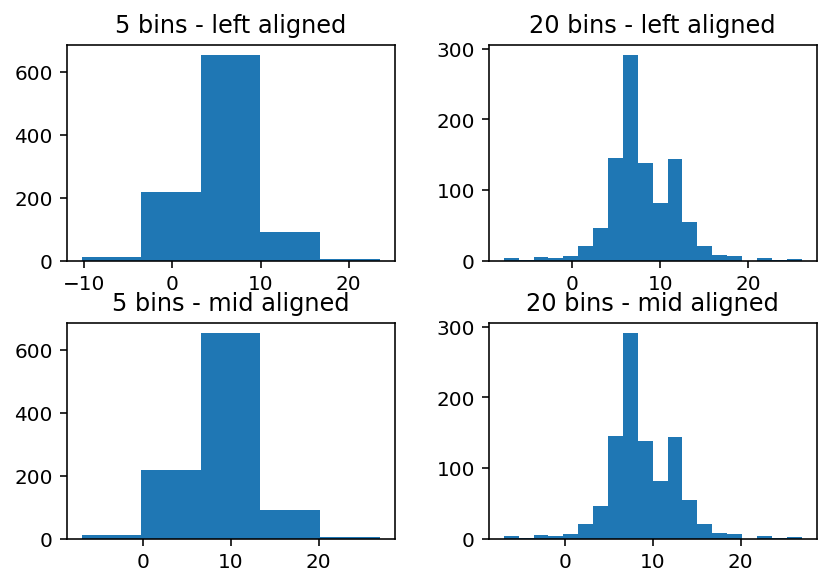

In [16]:
f, ax = plt.subplots(2, 2)
f.tight_layout(pad=1.0)
ax[0,0].hist(x,bins=5,align="left")
ax[0,0].set_title("5 bins - left aligned") #Complete
ax[0,1].hist(x,bins=20,align="left")
ax[0,1].set_title("20 bins - left aligned")#Complete
ax[1,0].hist(x,bins=5,align="mid") 
ax[1,0].set_title("5 bins - mid aligned") #Complete
ax[1,1].hist(x,bins=20,align="mid") 
ax[1,1].set_title("20 bins - mid aligned")#Complete



Note that the heights of these PDFs are all different! That's because the y-axis is scaled to the first histogram. Try using density = True so that the histograms are all normalized to 1.


Text(0.5, 1.0, '20 bins - mid aligned')

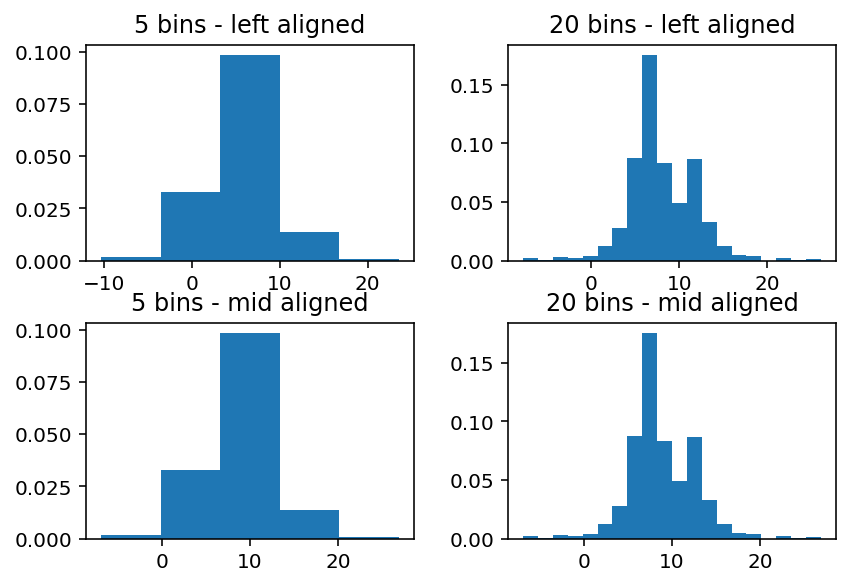

In [17]:
f, ax = plt.subplots(2, 2)
f.tight_layout(pad=1.0)
ax[0,0].hist(x,bins=5,align="left",density=True)
ax[0,0].set_title("5 bins - left aligned") #Complete
ax[0,1].hist(x,bins=20,align="left",density=True)
ax[0,1].set_title("20 bins - left aligned")#Complete
ax[1,0].hist(x,bins=5,align="mid",density=True) 
ax[1,0].set_title("5 bins - mid aligned") #Complete
ax[1,1].hist(x,bins=20,align="mid",density=True) 
ax[1,1].set_title("20 bins - mid aligned")#Complete



We find that small changes in parameters to the histogram function significantly change the pdf - not good, as the underlying data clearly have not changed.

One of the issues with histograms is that some bins end up with little (or no) data. We can fix this by making variable-width bin sizes that have the same number of objects in each bin. How can we do this?


In [18]:
#Execute this cell
a = np.linspace(1,42,num=42)
print(a)
print(a[::2])
print(a[::3])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37. 39. 41.]
[ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40.]




If you are familiar with slicing, then you know that [::2] and [::3] say to count by 2 and count by 3. But that isn't what they really do. They say to take every other index of the array or every 3rd index of the array. So, if your array is sorted (like a is), then you could use this to instead define the number of values in a bin. That is for any given value of M

`bins = np.append(np.sort(x)[::M], np.max(x))`

would give bins with `M` objects in each bin.

So if `M=3` and

`x = [1,3,5,7,9,11,13,21,29,35]`

then

`bins = [1 7 13 35]`

Note that you need to add the maximum value to set the right edge of the last bin.

Try it for `M=100` and `M=30` (100 and 30 objects in a bin).

<font color='red'>complete and run the following cells</font>


11 34


(-5.0, 25.0)

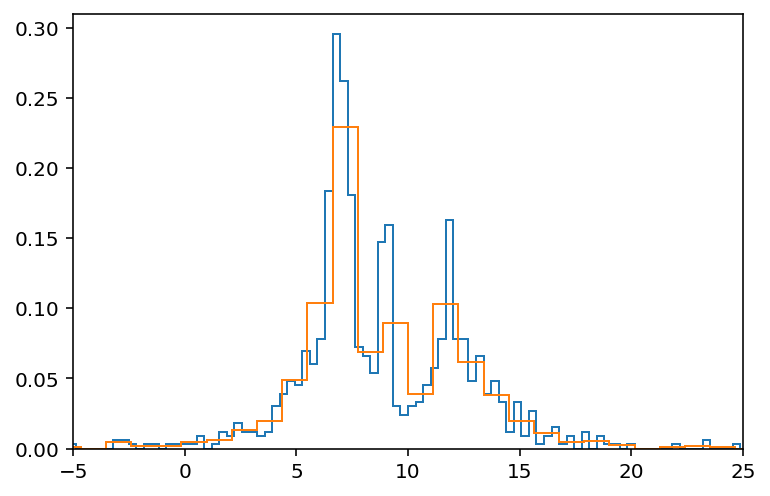

In [19]:
bins100 = np.append(np.sort(x)[::100], np.max(x)) #Complete
bins30 = np.append(np.sort(x)[::30], np.max(x)) #Complete
print(len(bins100),len(bins30))

#Note that the underscores here are suppressing the array output
#so that we just see the plots
_ = plt.hist(x, bins=100, density=True, histtype="step") #Complete
_ = plt.hist(x, bins=30, density=True, histtype="step") #Complete
plt.xlim(-5,25)




Again, this can look pretty different depending on what the number of objects you choose as the minimum for each bin and compared to the plots above. And it looks a lot different from the plots above.

So, what is the "right" way to set the bin size?

There is no "right" way, but we'll encounter some suggestions in Chapter 4. Let's take a quick look at them now.

"Scott's rule" suggests that the optimal bin width is 

$\Delta_b = \frac{3.5\sigma}{N^{1/3}}$


That's great, but what if we don't know the standard deviation, $\sigma$ (e.g., if the distribution isn't really Gaussian)? We can then instead used the "Freedman-Diaconis rule": 
                                                                          
                                                                          
                                                                          
$\Delta_b = \frac{2(q_{75}-q_{25})}{N^{1/3}} = \frac{2.7\sigma_G}{N^{1/3}}$

with $\sigma_G$ 0.7413 times the difference between the upper and lower quartiles, which you can determine with `np.percentile()`.

<font color='red'>complete and run the following cells</font>
                                                                          

In [20]:
q25 = np.percentile(x,25) #Complete
q75 = np.percentile(x,75) #Complete
#Or better yet
q25,q75 = np.percentile(x,[25,75]) #Complete
sigmaG = .7413*(q75-q25) #Complete
print(sigmaG)



3.673192301978193


Compare this to what you get using `stats.sigmaG()` from the astroML package. You'll have to import stats from astroML and give it a different name since stats right now refers to scipy.stats.

Ans: the result is very similar, but not precisely the same

In [21]:
from astroML import stats as astroMLstats
sigmaG2 = astroMLstats.sigmaG(x)
print(sigmaG2)

3.6731977984018402




Now set the bin size accordingly, using `np.arange` and plot. Make sure that you don't throw away the last object in data set! How many bins do you get? How does that compare to what we were using above?


In [22]:


binsize = 2.7*sigmaG2/(N**(1/3)) #Complete
print(binsize)
binsG = np.append(np.arange(start=x.min(), stop=x.max(), step=.1) , x.max()) #Complete
print(len(binsG))




0.9917634055684971
340


(-5.0, 25.0)

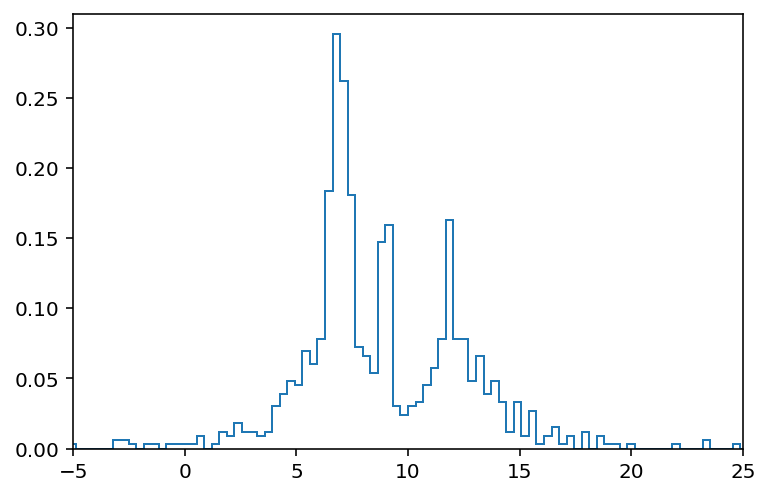

In [23]:

_ = plt.hist(x, bins=100, density=True, histtype="step") #Complete
plt.xlim(-5,25)



Fortunately there is a shortcut! Try it.

(-5.0, 25.0)

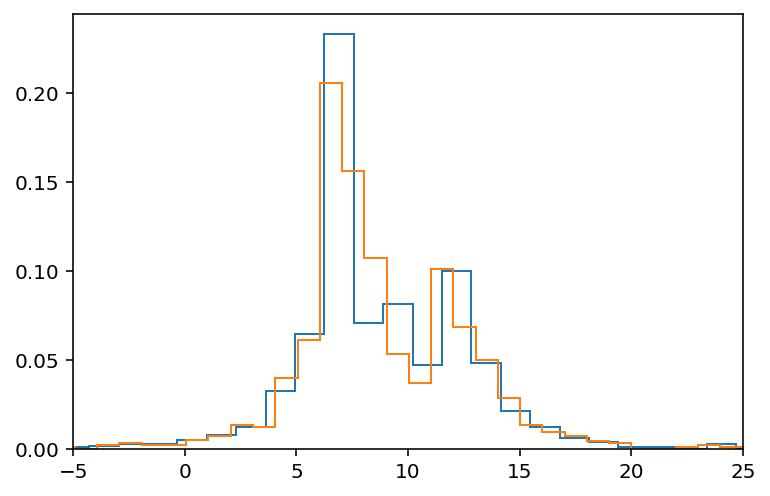

In [24]:
from astropy.visualization.hist import hist as fancyhist
_ = fancyhist(x, bins="scott", histtype="step",density=True)
_ = fancyhist(x, bins="freedman", histtype="step",density=True)
plt.xlim(-5,25)


Note that even those don't yield quite the same results!

An obvious thing to do is to simply show all of the data.

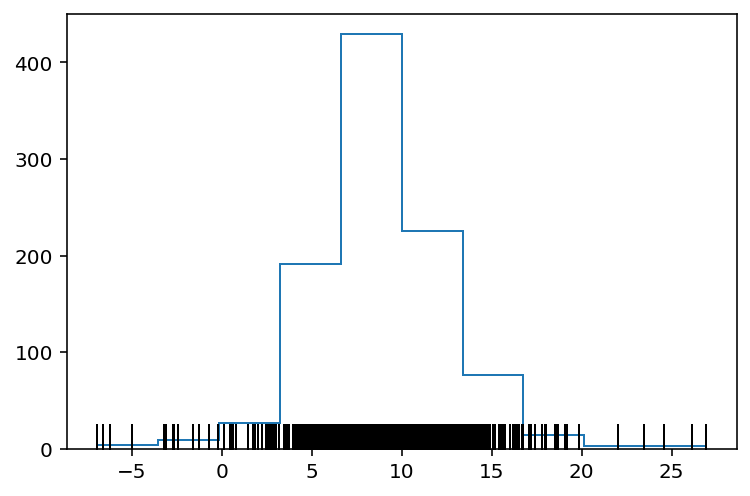

In [25]:
# execute this cell
plt.hist(x,histtype="step")
plt.plot(x, 0*x, '|', color='k', markersize=25) #Note markersize is (annoyingly) in *points*

This is called a rug plot and now we have a better idea of where most of the data and where the gaps really are (as opposed to where the binning makes them appear to be). However, the markers are all piled up, so we have lost all sense of the relative numbers of objects. Are there $\sim$10 at x=5 or could there be 100?


### Bayesian Blocks for Histograms
Bayesian Blocks is a dynamic histogramming method which optimizes one of several possible fitness functions to determine an optimal binning for data, where the bins are not necessarily uniform width. The astroML implementation is based on [1]. For more discussion of this technique, see the blog post at [2].

The code below uses a fitness function suitable for event data with possible repeats.

References

[1] Scargle, J et al. (2012) http://adsabs.harvard.edu/abs/2012arXiv1207.5578S
     
[2] http://jakevdp.github.com/blog/2012/09/12/dynamic-programming-in-python/


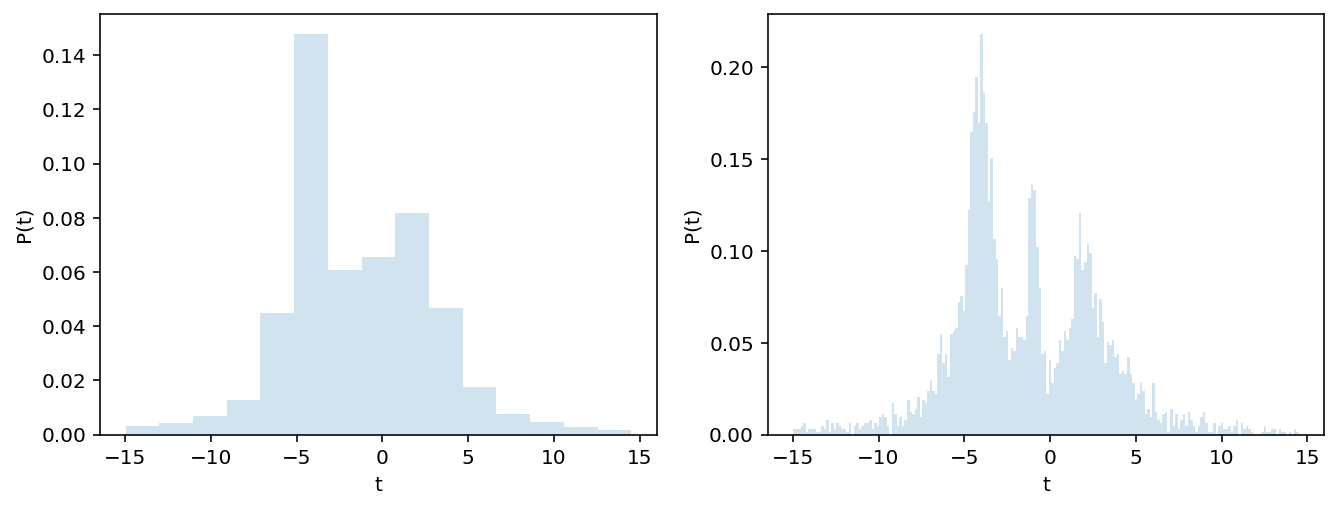

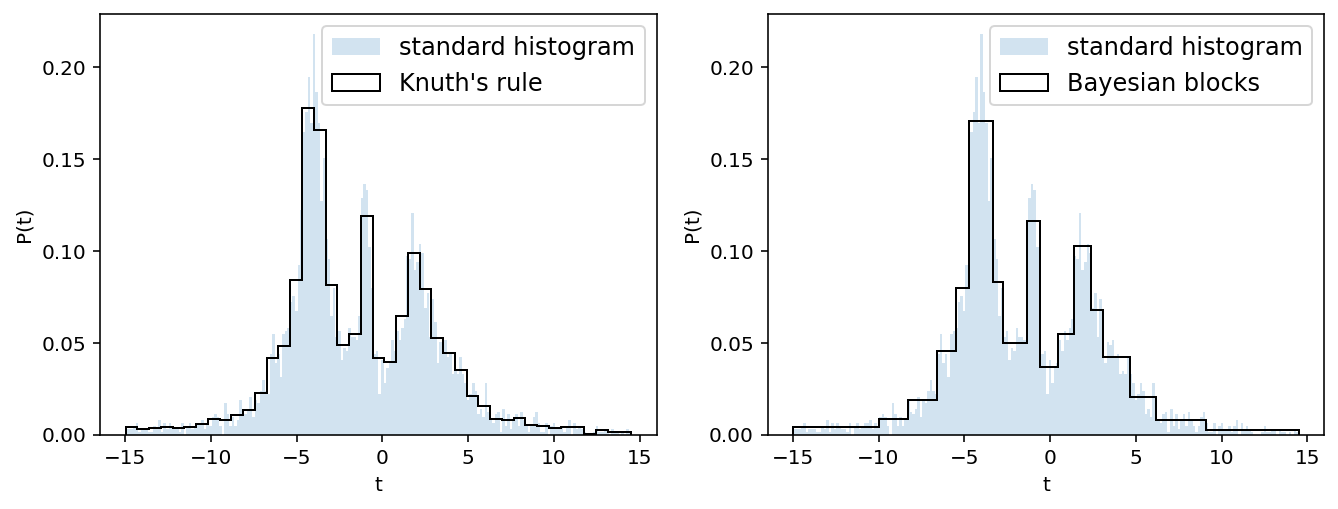

In [26]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astropy.visualization import hist

# draw a set of variables
np.random.seed(0)
t = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
t = t[(t > -15) & (t < 15)]

#------------------------------------------------------------
# First figure: show normal histogram binning
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

ax1 = fig.add_subplot(121)
ax1.hist(t, bins=15, histtype='stepfilled', alpha=0.2, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

ax2 = fig.add_subplot(122)
ax2.hist(t, bins=200, histtype='stepfilled', alpha=0.2, density=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)')

#------------------------------------------------------------
# Second & Third figure: Knuth bins & Bayesian Blocks
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

for bins, title, subplot in zip(['knuth', 'blocks'],
                                ["Knuth's rule", 'Bayesian blocks'],
                                [121, 122]):
    ax = fig.add_subplot(subplot)

    # plot a standard histogram in the background, with alpha transparency
    hist(t, bins=200, histtype='stepfilled',
         alpha=0.2, density=True, label='standard histogram')

    # plot an adaptive-width histogram on top
    hist(t, bins=bins, ax=ax, color='black',
         histtype='step', density=True, label=title)

    ax.legend(prop=dict(size=12))
    ax.set_xlabel('t')
    ax.set_ylabel('P(t)')

plt.show()

## 4. Bivariate and Multivariate pdfs <a class="anchor" id="fourth-bullet"></a>


Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ givesthe probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are **uncorrelated**, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the **(dimensionless) correlation coefficient**.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

**The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.**   

These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Ivezic, Figure 3.22):
![Ivezic, Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution. (Or in different terminology, the semi-minor and semi-major axes of the ellipse). These are called the **principal axes** and are given by

$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$

and

$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this (rotated) coordinate system are

$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that **the correlation vanishes in this coordinate system (by definition)** and the bivariate Gaussian is just a product of two univariate Gaussians.  

This concept will be crucial for understanding ***Principal Component Analysis*** later on.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that **outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$**.  

Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Ivezic, Figure 3.23 for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

<font color='red'>For an example of how to generate a bivariate distribution and plot confidence contours, read through, understand, and execute the following cell.</font>

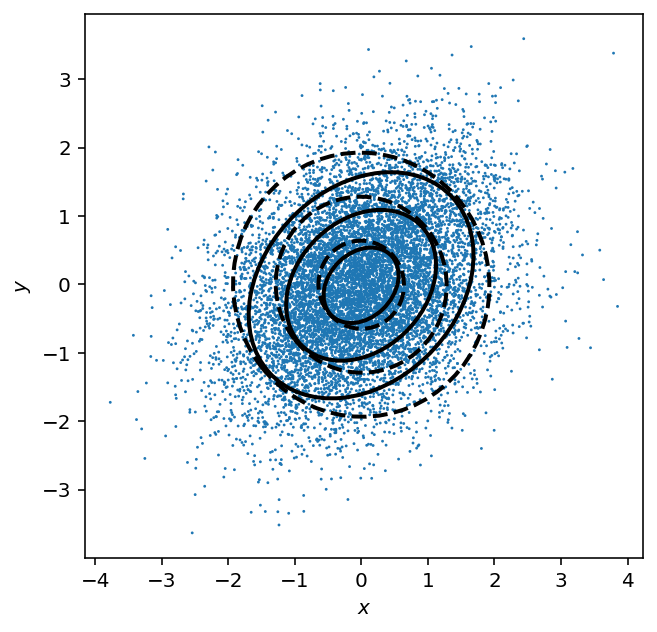

In [27]:
# Base code drawn from Ivezic, Figure 3.22, edited by G. Richards to simplify the example

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

# directional means
mux = 0
muy = 0

# directional standard deviations
sigx = 1.0
sigy = 1.0

# covariance
sigxy = 0.3

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = np.array([mux, muy])
cov = np.array([[sigx**2, sigxy], [sigxy, sigy**2]])
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#------------------------------------------------------------
# Add 2000 outliers drawn from a 5 times wider distribution
# with opposite covariance
xout, yout = np.random.multivariate_normal(mean, 
                                           5*cov*np.array([[1,-1],[-1,1]]), 
                                           2000).T

xt = np.append(x,xout)
yt = np.append(y,yout)

# Fit those data with a bivariate normal distribution
# Use robust and non-robust statistics estimates
mean_nr, sigma_x_nr, sigma_y_nr, alpha_nr = fit_bivariate_normal(xt, yt, robust=False)
mean_r, sigma_x_r, sigma_y_r, alpha_r = fit_bivariate_normal(xt, yt, robust=True)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean_nr, N * sigma_x_nr, N * sigma_y_nr, 
                         angle=alpha_nr * 180./np.pi, lw=2, 
                         ec='k', fc='none', ls='dashed'))
    ax.add_patch(Ellipse(mean_r, N * sigma_x_r, N * sigma_y_r, 
                         angle=alpha_r * 180./np.pi, lw=2, 
                         ec='k', fc='none'))
    
ax.set_xlabel('$x$');
ax.set_ylabel('$y$');

The non-robust estimates (***dashed lines***) give biased sigma ellipses due to the outliers. The robust estimates (***solid lines***) do much better.

We can generalize the way we describe **Gaussian distributions in multiple dimensions**, $M$, through the elegance of linear algebra. Instead of writing everything in terms of separate coordinates, we can bundle everything together in an $M$-dimensional coordinate vector $\vec{x}$, mean vector $\vec{\mu}$, and covariance matrix $\mathbf{C} = E([\vec{x}-\vec{\mu}][\vec{x}-\vec{\mu}]^T)$.

$$p(\vec{x}|\vec{\mu},\mathbf{C}) = \frac{1}{\sqrt{\mathrm{det}(2\pi\mathbf{C})}} \exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) \right] $$

where 

$$ C_{kj} = \int_{-\infty}^\infty (x^k-\mu^k)(x^j-\mu^j)p(\vec{x}|\vec{\mu},\mathbf{C})\,d^M x $$

and 

$$ (\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) = \sum_{k=1}^M \sum_{j=1}^M [\mathbf{C}^{-1}]_{kj}(x^k-\mu^k)(x^j-\mu^j) $$

## Summary <a class="anchor" id="fourth-bullet"></a>

At this point, all of you should have:
* seen examples for descriptive statistics and how to access them in Python
* seen examples for distributions
* plotted histograms and have understood why histograms need to be handled with care
* a basic understanding what multivariate distributions are, and how to plot them